In [1]:
import networkx as nx
import numpy as np
import scipy.stats
from tqdm.notebook import tqdm
import collections
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
import seaborn as sns
import random
import math
import re
import datetime
import matplotlib.dates as mdates
from scipy.special import comb

In [3]:
#file1 = open('../datasets/CollegeMsg.txt', 'r')
file1 = open('../datasets/email-Eu-core-temporal.txt','r')
Lines = file1.readlines()

#G.clear()
G = nx.MultiDiGraph()

count = 0
for line in tqdm(Lines):
    count += 1
    myLine = line.split(',')
    if myLine[0] not in G:
        G.add_node(myLine[0],falsePos=1)
    if myLine[1] not in G:
        G.add_node(myLine[1],falsePos=1)
    G.add_edge(myLine[0],myLine[1], weight=myLine[2])
print("There were",count,"lines in the file!") ##in our datasets lines correspond to sent messages in the communication system

  0%|          | 0/332334 [00:00<?, ?it/s]

There were 332334 lines in the file!


In [4]:
print("Number of nodes : ", G.order()) ##number of communicating parties 
print("Number of edges: ", G.size()) ##number of sent messages in the system
print("Density of the transaction graph: ",nx.classes.function.density(G))

Number of nodes :  986
Number of edges:  332334
Density of the transaction graph:  0.34218552115402434


In [5]:
noMsgsPerNodes = []
for u in G.nodes:
    for v in G.nodes:
        if u!=v and G.number_of_edges(u,v)!=0:
            noMsgsPerNodes.append(G.number_of_edges(u,v))
print(noMsgsPerNodes)          

[50, 4, 2, 9, 2, 1, 3, 10, 2, 3, 1, 20, 1, 1, 8, 3, 2, 1, 47, 2, 1, 1, 1, 4, 4, 1, 3, 2, 1, 3, 1, 71, 1, 1, 1, 18, 15, 1, 5, 1, 668, 1212, 11, 174, 12, 3, 25, 2, 39, 111, 42, 307, 2, 1, 12, 1, 73, 1, 3, 2, 24, 38, 1, 1, 15, 4, 3, 118, 235, 292, 435, 55, 18, 5, 3, 47, 14, 1, 4, 16, 5, 59, 2, 28, 1, 3, 1, 1, 72, 282, 31, 71, 76, 1, 3, 3, 20, 2, 1, 10, 84, 38, 6, 1, 21, 2, 3, 10, 27, 23, 14, 220, 335, 12, 96, 3, 1, 2, 1, 1, 19, 37, 6, 386, 145, 1, 3, 13, 3, 12, 48, 5, 258, 16, 5, 5, 1, 9, 5, 49, 1, 1, 84, 1, 5, 8, 3, 3, 1, 17, 2, 1, 1, 3, 16, 1, 5, 7, 3, 1, 113, 147, 1, 1, 21, 2, 5, 1, 6, 1, 63, 8, 2, 35, 1, 13, 1, 1, 1197, 273, 5, 3, 1, 8, 4, 10, 91, 32, 26, 302, 2, 5, 2, 4, 1, 100, 2, 3, 1, 1, 32, 2, 2, 1, 1, 12, 1, 1, 1, 1, 11, 2, 73, 113, 200, 117, 37, 9, 1, 46, 3, 6, 1, 11, 5, 19, 22, 4, 15, 2, 1, 5, 29, 65, 2, 2, 1, 1, 29, 34, 14, 4, 1, 1, 12, 46, 14, 1, 1, 14, 3, 2, 1, 5, 14, 31, 6, 87, 106, 61, 112, 1, 7, 29, 20, 4, 2, 6, 229, 10, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 3, 2, 12, 1, 2, 114,

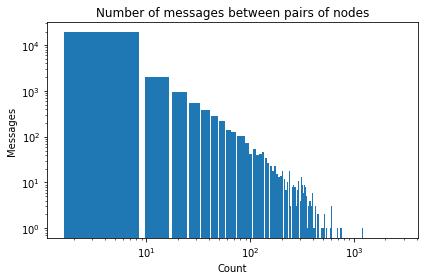

In [6]:
plt.hist(noMsgsPerNodes, bins=len(set(noMsgsPerNodes)), rwidth = 0.85)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Count')
plt.ylabel('Messages')
plt.title('Number of messages between pairs of nodes')
plt.tight_layout()
plt.savefig("messagesBetweenPairsEU.pdf")
plt.show()

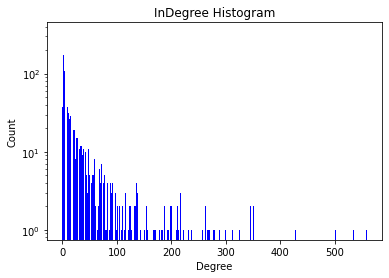

In [221]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, color="b")

plt.title("InDegree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
plt.show()

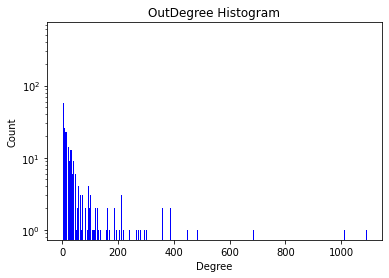

In [222]:
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, color="b")

plt.title("OutDegree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
plt.show()

In [47]:
entropies = np.zeros((10,20))
entropy = np.zeros((20))
for p in range(1,10):
    for M in range(20):
        onemp=1-math.pow(2,-p)
        ent = max(0,1/2*(1+math.log2(3.1415925)+math.log2(2.71828)+M-p+math.log2(onemp)))
        entropy[M]=ent
    entropies[p]=entropy
entropies = entropies[1:]
print(entropies)

[[1.04709506e+00 1.54709506e+00 2.04709506e+00 2.54709506e+00
  3.04709506e+00 3.54709506e+00 4.04709506e+00 4.54709506e+00
  5.04709506e+00 5.54709506e+00 6.04709506e+00 6.54709506e+00
  7.04709506e+00 7.54709506e+00 8.04709506e+00 8.54709506e+00
  9.04709506e+00 9.54709506e+00 1.00470951e+01 1.05470951e+01]
 [8.39576315e-01 1.33957632e+00 1.83957632e+00 2.33957632e+00
  2.83957632e+00 3.33957632e+00 3.83957632e+00 4.33957632e+00
  4.83957632e+00 5.33957632e+00 5.83957632e+00 6.33957632e+00
  6.83957632e+00 7.33957632e+00 7.83957632e+00 8.33957632e+00
  8.83957632e+00 9.33957632e+00 9.83957632e+00 1.03395763e+01]
 [4.50772526e-01 9.50772526e-01 1.45077253e+00 1.95077253e+00
  2.45077253e+00 2.95077253e+00 3.45077253e+00 3.95077253e+00
  4.45077253e+00 4.95077253e+00 5.45077253e+00 5.95077253e+00
  6.45077253e+00 6.95077253e+00 7.45077253e+00 7.95077253e+00
  8.45077253e+00 8.95077253e+00 9.45077253e+00 9.95077253e+00]
 [5.40362502e-04 5.00540363e-01 1.00054036e+00 1.50054036e+00
  2.0

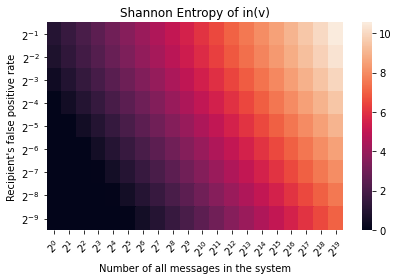

In [51]:
#x_axis_labels = [2**i for i in range(0,20)]
x_axis_labels = ["$2^0$","$2^1$","$2^2$","$2^3$","$2^4$","$2^5$","$2^6$","$2^7$","$2^8$","$2^9$","$2^{10}$",
                 "$2^{11}$","$2^{12}$","$2^{13}$","$2^{14}$","$2^{15}$","$2^{16}$","$2^{17}$","$2^{18}$","$2^{19}$"]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
y_axis_labels = ["$2^{-1}$","$2^{-2}$","$2^{-3}$","$2^{-4}$","$2^{-5}$","$2^{-6}$","$2^{-7}$","$2^{-8}$","$2^{-9}$"]
ax = sns.heatmap(entropies, xticklabels=x_axis_labels, yticklabels = y_axis_labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Shannon Entropy of in(v)')
plt.xlabel("Number of all messages in the system")
plt.ylabel("Recipient's false positive rate")
plt.tight_layout()
plt.savefig("incomingMsgEntropy.pdf")
plt.show()

In [21]:
noOfSentMsgs=20
minFalsePositiveRate = 10
allProbs = np.zeros((minFalsePositiveRate,noOfSentMsgs-1))
probability = np.zeros((noOfSentMsgs-1))
for p in range(1,minFalsePositiveRate):
    for k in range(0,noOfSentMsgs-1):
        prob = math.comb(noOfSentMsgs,k)*(2**(-(p*k)))*(1-2**(-p))**(noOfSentMsgs-k)
        probability[k]=max(1-prob,0)
        print(p,k,prob)
    break
    allProbs[p]=probability
allProbs = allProbs[1:]
print(allProbs)

1 0 9.5367431640625e-07
1 1 1.9073486328125e-05
1 2 0.0001811981201171875
1 3 0.001087188720703125
1 4 0.004620552062988281
1 5 0.0147857666015625
1 6 0.03696441650390625
1 7 0.0739288330078125
1 8 0.12013435363769531
1 9 0.16017913818359375
1 10 0.17619705200195312
1 11 0.16017913818359375
1 12 0.12013435363769531
1 13 0.0739288330078125
1 14 0.03696441650390625
1 15 0.0147857666015625
1 16 0.004620552062988281
1 17 0.001087188720703125
1 18 0.0001811981201171875
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

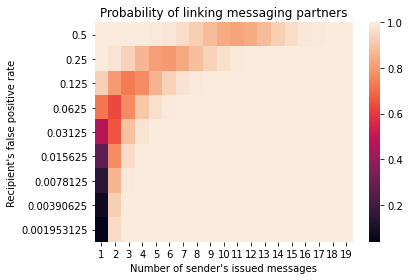

In [20]:
x_axis_labels = [i+1 for i in range(0,19)]
y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
ax = sns.heatmap(allProbs, xticklabels=x_axis_labels, yticklabels = y_axis_labels)
ax.set_title('Probability of linking messaging partners')
plt.xlabel("Number of sender's issued messages")
plt.ylabel("Recipient's false positive rate")
plt.tight_layout()
plt.savefig("probabilityOfRecurrent1.pdf")
plt.show()

In [125]:
## Sender unlinkability advantage
noOfUsers=11 ##2^20
minFalsePositiveRate = 9
allProbs = np.zeros((minFalsePositiveRate,noOfUsers-1)) #advantage of the sender unlinkability adversary
probability = np.zeros((noOfUsers-1))
for p in range(1,minFalsePositiveRate):
    falsePosRate = math.pow(2,-p)
    for l in tqdm(range(0,noOfUsers-1)):
        U = 2**l ##number of all users in the system
        sumprob = np.float64(0.0)
        for i in range(0,U+1):
            for j in range(0,U+1):    
            #usersInAnonSet = math.floor(2**(-p+k))
            #print(p,k,allUsers,usersInAnonSet)
                prob = np.float64(1.0)
                probij = np.float64(1.0)
                probij = comb(U, i, exact=True)*comb(U, j, exact=True)*math.pow(falsePosRate,i+j)*math.pow(1-falsePosRate,2*U-i-j)
                for k in range(1,j+1):
                    if U-i-k<0:
                        prob = 0
                        break
                    prob *= (U-i-k)
                    prob /= U
                sumprob += prob * probij
                #print(U,falsePosRate,i,j,prob,probij)
        probability[l]=sumprob*0.5
        #print("Users: ",U," False Positive Rate: ",falsePosRate," Prob: ",sumprob*0.5)
    allProbs[p]=probability
allProbs = allProbs[1:]
print(allProbs)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[[2.50000000e-01 1.56250000e-01 7.54394531e-02 1.97586934e-02
  1.34421797e-03 6.12358339e-06 1.26095989e-10 5.32649493e-20
  9.48649106e-39 3.00626887e-76]
 [3.75000000e-01 3.33984375e-01 2.82649040e-01 2.03989722e-01
  1.05457807e-01 2.80719001e-02 1.98523632e-03 9.91920739e-06
  2.47514207e-10 1.54079085e-19]
 [4.37500000e-01 4.24682617e-01 4.07355811e-01 3.74261032e-01
  3.15197840e-01 2.23313436e-01 1.12031491e-01 2.81885553e-02
  1.78434819e-03 7.14930685e-06]
 [4.68750000e-01 4.65202332e-01 4.60330766e-01 4.50351498e-01
  4.30763785e-01 3.93984678e-01 3.29528436e-01 2.30508450e-01
  1.12786784e-01 2.70017978e-02]
 [4.84375000e-01 4.83443737e-01 4.82161845e-01 4.79470454e-01
  4.74052407e-01 4.63360551e-01 4.42676446e-01 4.04028626e-01
  3.36557359e-01 2.33534343e-01]
 [4.92187500e-01 4.91949052e-01 4.91620862e-01 4.90925153e-01
  4.89515185e-01 4.86696768e-01 4.81103290e-01 4.70105895e-01
  4.48858302e-01 4.09200167e-01]
 [4.96093750e-01 4.96033428e-01 4.95950436e-01 4.95773780e

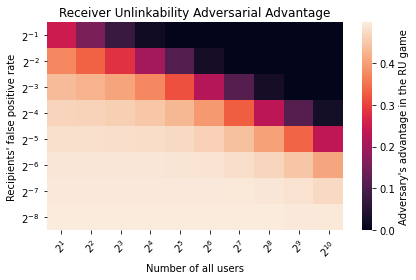

In [127]:
x_axis_labels = ["$2^1$","$2^2$","$2^3$","$2^4$","$2^5$","$2^6$","$2^7$","$2^8$","$2^9$","$2^{10}$"]
                 ##"$2^{11}$","$2^{12}$","$2^{13}$","$2^{14}$","$2^{15}$","$2^{16}$","$2^{17}$","$2^{18}$","$2^{19}$"]
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
y_axis_labels = ["$2^{-1}$","$2^{-2}$","$2^{-3}$","$2^{-4}$","$2^{-5}$","$2^{-6}$","$2^{-7}$","$2^{-8}$"]#,"$2^{-9}$"]
ax = sns.heatmap(allProbs,xticklabels=x_axis_labels, yticklabels = y_axis_labels,cbar_kws={'label': 'Adversary\'s advantage in the RU game'})
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Receiver Unlinkability Adversarial Advantage')
plt.xlabel("Number of all users")
plt.ylabel("Recipients' false positive rate")
plt.tight_layout()
plt.savefig("receiverUnlinkability.pdf")
plt.show()

In [56]:
## Relationship Anonymity
noOfSentMessages=[100,250,500,1000,2500,5000,10000] ##out(s) in the paper
incomingMsgsFromS = np.arange(1,1000) ##tag_s(v) in the paper
falsePositives = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
detectableMsgs = np.zeros((len(noOfSentMessages),len(falsePositives)))
for p in falsePositives:
    for allSent in noOfSentMessages:
        for incomingFromS in incomingMsgsFromS:
            if allSent < incomingFromS:
                continue
            mu0 = allSent*p ##the expected number of links in the "cover" graph
            X = (allSent-incomingFromS)*p + incomingFromS
            s = math.sqrt(p*(1-p)*allSent)
            z = (X-mu0)/(float)(s) ##Z-score
            p_values = scipy.stats.norm.sf(abs(z))*2 #twosided
            if p_values < 0.01:
                detectableMsgs[noOfSentMessages.index(allSent)][falsePositives.index(p)] = int(incomingFromS)
                print("DETECTABLE",p,allSent,incomingFromS)
                break
print(detectableMsgs)

DETECTABLE 0.1 100 9
DETECTABLE 0.1 250 14
DETECTABLE 0.1 500 20
DETECTABLE 0.1 1000 28
DETECTABLE 0.1 2500 43
DETECTABLE 0.1 5000 61
DETECTABLE 0.1 10000 86
DETECTABLE 0.2 100 13
DETECTABLE 0.2 250 21
DETECTABLE 0.2 500 29
DETECTABLE 0.2 1000 41
DETECTABLE 0.2 2500 65
DETECTABLE 0.2 5000 92
DETECTABLE 0.2 10000 129
DETECTABLE 0.3 100 17
DETECTABLE 0.3 250 27
DETECTABLE 0.3 500 38
DETECTABLE 0.3 1000 54
DETECTABLE 0.3 2500 85
DETECTABLE 0.3 5000 120
DETECTABLE 0.3 10000 169
DETECTABLE 0.4 100 22
DETECTABLE 0.4 250 34
DETECTABLE 0.4 500 48
DETECTABLE 0.4 1000 67
DETECTABLE 0.4 2500 106
DETECTABLE 0.4 5000 149
DETECTABLE 0.4 10000 211
DETECTABLE 0.5 100 26
DETECTABLE 0.5 250 41
DETECTABLE 0.5 500 58
DETECTABLE 0.5 1000 82
DETECTABLE 0.5 2500 129
DETECTABLE 0.5 5000 183
DETECTABLE 0.5 10000 258
DETECTABLE 0.6 100 32
DETECTABLE 0.6 250 50
DETECTABLE 0.6 500 71
DETECTABLE 0.6 1000 100
DETECTABLE 0.6 2500 158
DETECTABLE 0.6 5000 224
DETECTABLE 0.6 10000 316
DETECTABLE 0.7 100 40
DETECTABLE 0

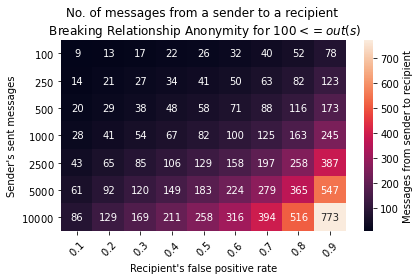

In [61]:
y_axis_labels = ["$10000$","$5000$","$2500$","$1000$","$500$","$250$","$100$"]
y_axis_labels.reverse()
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
x_axis_labels = ["$0.1$", "$0.2$", "$0.3$", "$0.4$", "$0.5$", "$0.6$", "$0.7$", "$0.8$", "$0.9$"]
ax = sns.heatmap(detectableMsgs, fmt='g',annot=True, mask=detectableMsgs < 1,xticklabels=x_axis_labels, yticklabels = y_axis_labels,  cbar_kws={'label': 'Messages from sender to recipient'})
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('No. of messages from a sender to a recipient \n breaking relationship anonymity for $100 <= out(s)$')
plt.xlabel("Recipient's false positive rate")
plt.ylabel("Sender's sent messages")
plt.tight_layout()
plt.savefig("relationshipAnonymity.pdf")
plt.show()

In [63]:
## Relationship Anonymity vol. 2.
noOfSentMessages=[10,15,20,25,30] ##out(s) in the paper
incomingMsgsFromS = np.arange(1,30) ##tag_s(v) in the paper
falsePositives = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
detectableMsgs = np.zeros((len(noOfSentMessages),len(falsePositives))) #advantage of the sender unlinkability adversary
for p in falsePositives:
    for allSent in noOfSentMessages:
        for incomingFromS in incomingMsgsFromS:
            if allSent < incomingFromS:
                continue
            mu0 = allSent*p
            X = (allSent-incomingFromS)*p + incomingFromS
            s = math.sqrt(p*(1-p)*allSent)
            t = (X-mu0)/(float)(s) ##t-score
            p_values = scipy.stats.t.sf(np.abs(t), allSent-1)*2 #two-sided
            if p_values < 0.01:
                detectableMsgs[noOfSentMessages.index(allSent)][falsePositives.index(p)] = int(incomingFromS)
                print(p,allSent,incomingFromS)
                if incomingFromS!=1:
                    print("DETECTABLE",p,allSent,incomingFromS)
                break
print(detectableMsgs)

0.1 10 4
DETECTABLE 0.1 10 4
0.1 15 4
DETECTABLE 0.1 15 4
0.1 20 5
DETECTABLE 0.1 20 5
0.1 25 5
DETECTABLE 0.1 25 5
0.1 30 6
DETECTABLE 0.1 30 6
0.2 10 6
DETECTABLE 0.2 10 6
0.2 15 6
DETECTABLE 0.2 15 6
0.2 20 7
DETECTABLE 0.2 20 7
0.2 25 7
DETECTABLE 0.2 25 7
0.2 30 8
DETECTABLE 0.2 30 8
0.3 10 7
DETECTABLE 0.3 10 7
0.3 15 8
DETECTABLE 0.3 15 8
0.3 20 9
DETECTABLE 0.3 20 9
0.3 25 10
DETECTABLE 0.3 25 10
0.3 30 10
DETECTABLE 0.3 30 10
0.4 10 9
DETECTABLE 0.4 10 9
0.4 15 10
DETECTABLE 0.4 15 10
0.4 20 11
DETECTABLE 0.4 20 11
0.4 25 12
DETECTABLE 0.4 25 12
0.4 30 13
DETECTABLE 0.4 30 13
0.5 15 12
DETECTABLE 0.5 15 12
0.5 20 13
DETECTABLE 0.5 20 13
0.5 25 14
DETECTABLE 0.5 25 14
0.5 30 16
DETECTABLE 0.5 30 16
0.6 15 15
DETECTABLE 0.6 15 15
0.6 20 16
DETECTABLE 0.6 20 16
0.6 25 18
DETECTABLE 0.6 25 18
0.6 30 19
DETECTABLE 0.6 30 19
0.7 20 20
DETECTABLE 0.7 20 20
0.7 25 22
DETECTABLE 0.7 25 22
0.7 30 24
DETECTABLE 0.7 30 24
[[ 4.  6.  7.  9.  0.  0.  0.  0.  0.]
 [ 4.  6.  8. 10. 12. 15.  0

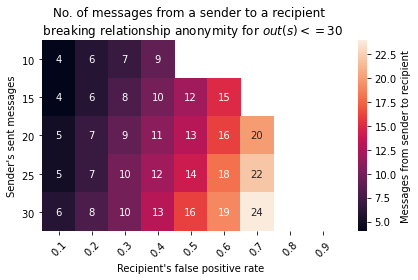

In [64]:
y_axis_labels = ["$30$","$25$","$20$","$15$","$10$"]
y_axis_labels.reverse()
##x_axis_labels = [2**(i+1) for i in range(0,19)]
#y_axis_labels = [math.pow(2,-(i)) for i in range(1,10)]
x_axis_labels = ["$0.1$", "$0.2$", "$0.3$", "$0.4$", "$0.5$", "$0.6$", "$0.7$", "$0.8$","$0.9$"]
ax = sns.heatmap(detectableMsgs,annot=True, mask=detectableMsgs < 1,xticklabels=x_axis_labels, yticklabels = y_axis_labels, cbar_kws={'label': 'Messages from sender to recipient'})
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('No. of messages from a sender to a recipient \n breaking relationship anonymity for $out(s)<=30$')
plt.xlabel("Recipient's false positive rate")
plt.ylabel("Sender's sent messages")
plt.tight_layout()
plt.savefig("relationshipAnonymity2.pdf")
plt.show()

In [7]:
## Adding false positive rates to the recipients!
G.nodes['2']['falsePos']=0.1454

In [8]:
## Setting randomly false positive rates to FMD users!
falsePositiveRates = [pow(2,-k) for k in range(1,8)]
for u in tqdm(G.nodes):
    randIndex = random.randint(0,len(falsePositiveRates)-1)
    G.nodes[u]['falsePos']=falsePositiveRates[randIndex]

  0%|          | 0/986 [00:00<?, ?it/s]

In [10]:
#coverG.clear()
coverG = G.copy() ##this graph will contain all the "cover" edges thanks to FMD according to recipients' false positive rates
print(G.nodes['5'])

{'falsePos': 0.03125}


In [11]:
for msg in tqdm(G.edges):
    for recipient in G.nodes()-msg[1]: ##for the original recipient we already have an edge in the cover graph
        recFalsePos = G.nodes[recipient]['falsePos']
        #randNum = random.uniform(0, 1)
        randNum = np.random.uniform(0,1)
        if randNum <= recFalsePos:
            coverG.add_edge(msg[0],recipient,weight=1996)
    

  0%|          | 0/332334 [00:00<?, ?it/s]

In [12]:
print("Number of nodes : ", coverG.order())
print("Number of edges: ", coverG.size())
print("Density of the transaction graph: ",nx.classes.function.density(coverG))

Number of nodes :  986
Number of edges:  44571156
Density of the transaction graph:  45.89239814252324


In [13]:
##Let's uncover the social graph using statistical tests (Z- and t-tests)!
##Relationship anonymity analysis
##Hereby we assume the server knows the number of sent messages per users.
##This is the case when FMD is deployed without an additional layer of anonymous communication system (e.g. Tor)
relevants = 0
truePositives = 0
trueNegatives = 0
falseNegatives = 0
falsePositives = 0
for u in tqdm(G.nodes):     
    allLinks = coverG.out_degree(u)
    neighbors = list(coverG.neighbors(u)) ##this is the neighbors the server sees
    for v in neighbors:
        flags = coverG.number_of_edges(u,v)
        p = G.nodes[v]['falsePos']
        mu0 = G.out_degree(u)*p ##in the paper we also call this ideal rate
        s = math.sqrt(G.out_degree(u)*p*(1-p))
        z = (flags-mu0)/s
        relatedNodes = False 
        if 30 < G.out_degree(u):
            p_values = scipy.stats.norm.sf(abs(z))*2
        else: 
            p_values = scipy.stats.t.sf(np.abs(z), G.out_degree(u)-1)*2 ##t-test
        if p_values < 0.01:
            relevants+=1
            if 0 < G.number_of_edges(u,v):
                relatedNodes = True
                truePositives+=1
            else:
                falseNegatives+=1
        else:
            if 0==G.number_of_edges(u,v):
                trueNegatives+=1
            else:
                falsePositives+=1 
                relatedNodes = True
                #print("Node",u," and node ",v," are connected: ",relatedNodes, mu0,flags,p_values,p,G.number_of_edges(u,v))
print("Precision:",truePositives/(truePositives+falsePositives))
print("Recall:",truePositives/(truePositives+falseNegatives))
print(truePositives, falsePositives, trueNegatives, falseNegatives)
print("Number of irrelevants:",relevants)

  0%|          | 0/986 [00:00<?, ?it/s]

Precision: 0.23213927554254082
Recall: 0.3755841121495327
5787 19142 616228 9621
Number of irrelevants: 15408


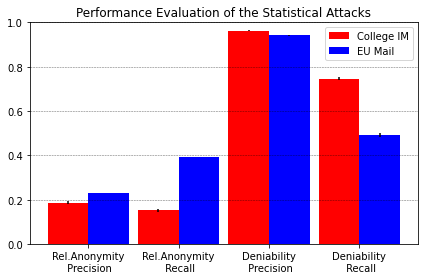

In [106]:
## College results
## Precision: 0.1692057942057942
## Recall: 0.19295122819508723
## Number of nodes :  1899
## Number of messages : 59835
## Density of the message graph:  0.016600995144136092
## Number of "cover" edges:  16095322
## Density of the cover message graph:  4.4655864020273555
## Number of edges:  16354849
## Density of the transaction graph:  4.537591189639492

## College results with t-tests
## Precision: 0.18141505715411904
## Recall: 0.1453382805715639
## TP: 3682 FP: 16614 TN: 1394619 FN: 21652
## Number of relevants: 25334

## EU results
## Precision: 0.22809780356402817
## Recall: 0.41361689336439467
## Number of nodes :  986
## Number of messages: 332334
## Number of cover edges:  47708341
## Density of the cover message graph:  49.12258008051812
## TP:5504 FP:18626 TN:537578 FN:7803
## Number of irrelevants: 369

## EU results with t-tests
## Precision: 0.2294115287416262
## Recall: 0.39184652278177456
## TP:5719 FP:19210 TN:619865 FN:8876
## Number of relevants: 14595
collegeMsgRAPrecisions = np.array([0.18141505715411904,0.19087504927079227,0.18200630666141113,0.19570358691367756])
collegeMsgRARecalls = np.array([0.1453382805715639,0.15141684580809067,0.15223573047599423,0.15904540722351246])
collegeMsgDeniabilityPrecisions = np.array([0.9627473806752037,0.9616766467065868,0.9629629629629629,0.9636576787807737,
                                  0.9614485981308412,0.9638273045507585,0.9657210401891253,0.9626168224299065,
                                           0.9628339140534262,0.9637002341920374])
collegeMsgDeniabilityRecalls = np.array([0.7525022747952684,0.7306642402183804,0.7333939945404914,0.7479526842584168,
                               0.7488626023657871,0.7515923566878981,0.7434030937215651,0.7497725204731575,
                                        0.7543221110100091,0.7488626023657871])
euMsgRAPrecisions = np.array([0.2294115287416262])
euMsgRARecalls = np.array([0.39184652278177456])
euMsgDeniabilityPrecisions = np.array([0.9394736842105263,0.9432432432432433,0.9335180055401662,0.9388297872340425,
                                      0.946524064171123,0.9436619718309859,0.9424657534246575,0.9394736842105263,
                                      0.9392265193370166,0.945054945054945])
euMsgDeniabilityRecalls = np.array([0.5063829787234042,0.4950354609929078,0.47801418439716314,0.500709219858156,
                                   0.502127659574468,0.475177304964539,0.4879432624113475,0.5063829787234042,
                                    0.48226950354609927,0.4879432624113475])


# Calculate the average
collegeMsgRAPrecisionsMean = np.mean(collegeMsgRAPrecisions)
collegeMsgRARecallsMean = np.mean(collegeMsgRARecalls)
collegeMsgDeniabilityPrecisionsMean = np.mean(collegeMsgDeniabilityPrecisions)
collegeMsgDeniabilityRecallsMean = np.mean(collegeMsgDeniabilityRecalls)
euMsgRAPrecisionsMean = np.mean(euMsgRAPrecisions)
euMsgRARecallsMean = np.mean(euMsgRARecalls)
euMsgDeniabilityPrecisionsMean = np.mean(euMsgDeniabilityPrecisions)
euMsgDeniabilityRecallsMean = np.mean(euMsgDeniabilityRecalls)


# Calculate the standard deviation
collegeMsgRAPrecisionsStd = np.std(collegeMsgRAPrecisions)
collegeMsgRARecallsStd = np.std(collegeMsgRARecalls)
collegeMsgDeniabilityPrecisionsStd = np.std(collegeMsgDeniabilityPrecisions)
collegeMsgDeniabilityRecallsStd = np.std(collegeMsgDeniabilityRecalls)
euMsgRAPrecisionsStd = np.std(euMsgRAPrecisions)
euMsgRARecallsStd = np.std(euMsgRARecalls)
euMsgDeniabilityPrecisionsStd = np.std(euMsgDeniabilityPrecisions)
euMsgDeniabilityRecallsStd = np.std(euMsgDeniabilityRecalls)

length = 4
x_labels = ['Rel.Anonymity\n Precision', 'Rel.Anonymity\n Recall', 'Deniability\n Precision','Deniability\n Recall']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.45 # width of bar
x = np.arange(length)

collegeMeans = np.array([collegeMsgRAPrecisionsMean,collegeMsgRARecallsMean,collegeMsgDeniabilityPrecisionsMean,collegeMsgDeniabilityRecallsMean], dtype=float)
euMeans = np.array([euMsgRAPrecisionsMean, euMsgRARecallsMean, euMsgDeniabilityPrecisionsMean, euMsgDeniabilityRecallsMean], dtype=float)

ax.bar(x, collegeMeans, width, color='red', label='College IM', yerr=np.array([collegeMsgRAPrecisionsStd,collegeMsgRARecallsStd,collegeMsgDeniabilityPrecisionsStd,collegeMsgDeniabilityRecallsStd], dtype=float))
ax.bar(x + width, euMeans, width, color='blue', label='EU Mail', yerr=np.array([euMsgRAPrecisionsStd,euMsgRARecallsStd,euMsgDeniabilityPrecisionsStd,euMsgDeniabilityRecallsStd], dtype=float))

ax.set_ylabel('')
ax.set_ylim(0,1)
ax.set_xticks(x + width/2)
ax.set_xticklabels(x_labels)
ax.yaxis.grid(True)
#ax.set_xlabel('Scenario')
ax.set_title('Performance Evaluation of the Statistical Attacks')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.6)

fig.tight_layout()
plt.savefig('evaluation.pdf')
plt.show()

In [10]:
H = nx.Graph(G)
print(len(list(H.edges)))

13838


In [105]:
## Temporal Uniformity of Detection
## We build the graph edge by edge adding also the cover (fuzzy edges) and try to predict
## whether a node has received a message given only the fuzzy edges
G.clear()
#file1 = open('../datasets/CollegeMsg.txt', 'r')
file1 = open('../datasets/email-Eu-core-temporal.txt','r')
Lines = file1.readlines()

G = nx.MultiDiGraph() ## this is the graph with also the "cover/fuzzy" edges
H = nx.MultiDiGraph() ## this is the graph that only contains the edges of the real messages

minFp = 8
falsePositiveRates = [pow(2,-k) for k in range(1,minFp)]
msgCount = 0
truePositivesDetectionRates = []
truePositivesDegrees = []
falsePositivesDetectionRates = []
falsePositivesDegrees = []
truePositives = 0
trueNegatives = 0
falseNegatives = 0
falsePositives = 0
receivedMsg = []
for line in tqdm(Lines):
    msgCount += 1
    myLine = line.split(',')
    if myLine[0] not in G:
        randIndex = random.randint(0,len(falsePositiveRates)-1)
        G.add_node(myLine[0],falsePos=falsePositiveRates[randIndex])
        H.add_node(myLine[0])
    if myLine[1] not in G:
        randIndex = random.randint(0,len(falsePositiveRates)-1)
        G.add_node(myLine[1],falsePos=falsePositiveRates[randIndex])
        H.add_node(myLine[1])
    G.add_edge(myLine[0],myLine[1], weight=myLine[2])
    H.add_edge(myLine[0],myLine[1], weight=myLine[2])
    receivedMsg.append(myLine[1])   
    ## add cover edges probabilistically for all the other nodes for this message
    for u in G:
        if u!=myLine[0] and u!=myLine[1]:
            recFalsePos =G.nodes[str(u)]['falsePos']
            randNum = np.random.uniform(0,1)
            if randNum <= recFalsePos:
                G.add_edge(myLine[0],u,weight=1996)
                
    if msgCount % 1000 == 0:
        print(msgCount)
                
    if msgCount == 25000:
        break     
for u in G:
    flags = G.in_degree(u)
    p = G.nodes[str(u)]['falsePos']
    mu0 = msgCount*p ##in the paper we also call this ideal rate
    s = math.sqrt(msgCount*p*(1-p))
    z = (flags-mu0)/s
    p_values = scipy.stats.norm.sf(abs(z))
    if p_values < 0.01:
        if u in receivedMsg:
            truePositives+=1
            truePositivesDetectionRates.append(p)
            truePositivesDegrees.append(H.degree(u))
        else:
            falsePositives+=1
            falsePositivesDetectionRates.append(p)
            falsePositivesDegrees.append(H.degree(u))
    else:
        if u in receivedMsg:
            falseNegatives+=1
        else:
            trueNegatives+=1
print(truePositives,falsePositives,trueNegatives,falseNegatives)
print("Precision:",truePositives/(truePositives+falsePositives))
print("Recall:",truePositives/(truePositives+falseNegatives))

  0%|          | 0/332334 [00:00<?, ?it/s]

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
344 20 5 361
Precision: 0.945054945054945
Recall: 0.4879432624113475


In [ ]:
## Detection ambiguity up to 25000 messages
## Results for EU core e-mail: TP: 350 FP:22 TN:3 FN:355
## Results for the college IM: TP: 810 FP: 31 TN:6 FN:289

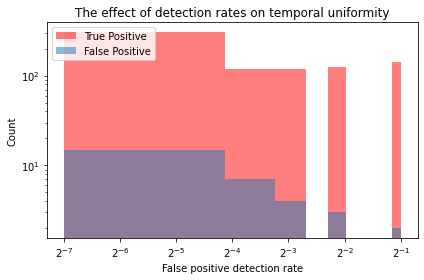

<Figure size 432x288 with 0 Axes>

In [9]:
plt.hist(truePositivesDetectionRates, color='r', alpha=0.5, label='True Positive')
plt.hist(falsePositivesDetectionRates, alpha=0.5, label='False Positive')
plt.xscale('log',base=2)
plt.yscale('log',base=10)
plt.xlabel('False positive detection rate')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.title("The effect of detection rates on temporal uniformity")
plt.tight_layout()
plt.show()
plt.savefig('temporalUniformityDetectionRatesCollege.pdf')

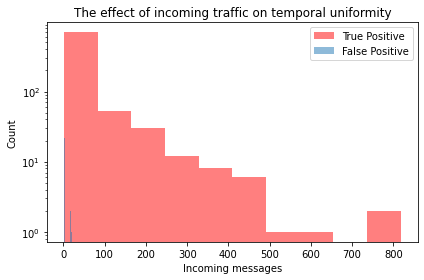

<Figure size 432x288 with 0 Axes>

In [10]:
plt.hist(truePositivesDegrees, color='r', alpha=0.5, label='True Positive')
plt.hist(falsePositivesDegrees, alpha=0.5, label='False Positive')
#plt.xscale('log',base=10)
plt.yscale('log',base=10)
plt.xlabel('Incoming messages')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title("The effect of incoming traffic on temporal uniformity")
plt.tight_layout()
plt.show()
plt.savefig('temporalUniformityDegreesCollege.pdf')

In [67]:
##Detection ambiguity and temporal uniformity of detection
allMessages = [1000,10000,100000,1000000,10000000]
sentOutMsgs = [5,10,25,50,100,250,500,1000]
maxSentMessages = 100
detectableTrueMsgs = np.zeros((len(allMessages),len(sentOutMsgs)))
for N in allMessages:
    for m in sentOutMsgs:
        for p in np.arange(0.5,0.001,-0.001):
            sigma=math.sqrt(p*(1-p)*N)
            if 3*sigma < m:
                detectableTrueMsgs[allMessages.index(N)][sentOutMsgs.index(m)]=p
                break
print(detectableTrueMsgs)

[[0.002 0.011 0.075 0.5   0.5   0.5   0.5   0.5  ]
 [0.    0.    0.006 0.028 0.127 0.5   0.5   0.5  ]
 [0.    0.    0.    0.002 0.011 0.075 0.5   0.5  ]
 [0.    0.    0.    0.    0.    0.006 0.028 0.127]
 [0.    0.    0.    0.    0.    0.    0.002 0.011]]


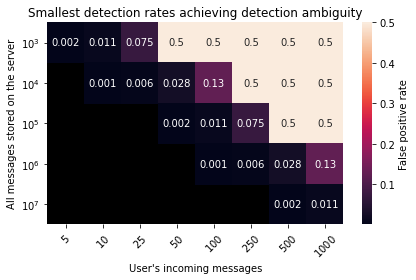

In [30]:
y_axis_labels = ["$10^3$","$10^4$","$10^5$","$10^6$","$10^7$"]
x_axis_labels = ["$5$", "$10$", "$25$", "$50$", "$100$", "$250$", "$500$","$1000$"]
ax = sns.heatmap(detectableTrueMsgs, annot=True, mask=detectableTrueMsgs < 0.00001,xticklabels=x_axis_labels, yticklabels = y_axis_labels, cbar_kws={'label': 'False positive rate'})
ax.set_facecolor('xkcd:black')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
ax.set_title('Smallest detection rates achieving detection ambiguity')
plt.ylabel("All messages stored on the server")
plt.xlabel("User's incoming messages")
plt.tight_layout()
plt.savefig("detectionAmbiguity.pdf")
plt.show()

In [113]:
userId = '1624' ##it has an in_degree 558
userFalsePositiveRate = math.pow(2,-7)
timestamps = [] ##contains the timestamp of all the messages
userTimestamps = []
userTimestampsFrequent = []
for edge in tqdm(G.edges(data=True)):
    if edge[2]['weight'] == 1996: ##these are cover edges, we are not interested in them at this point
        continue
    else: 
        timestamps.append(int(edge[2]['weight'].rstrip()))
    if edge[1]==userId:
        userTimestamps.append(int(edge[2]['weight'].rstrip()))
        userTimestampsFrequent.append(int(edge[2]['weight'].rstrip()))
    else: 
        randNum = np.random.uniform(0,1)
        if randNum <= userFalsePositiveRate:
            userTimestamps.append(int(edge[2]['weight'].rstrip()))
        if randNum <= 8*userFalsePositiveRate:
            userTimestampsFrequent.append(int(edge[2]['weight'].rstrip()))
print(len(timestamps),len(userTimestamps),len(userTimestampsFrequent))

  0%|          | 0/59835 [00:00<?, ?it/s]

59835 1025 4331


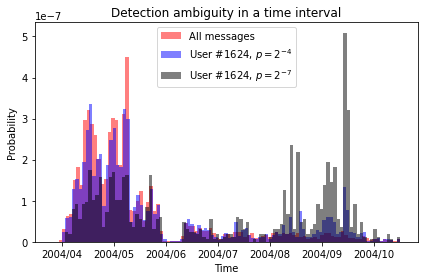

In [187]:
plt.hist(timestamps, color = "red",density=True,bins=100,alpha=0.5,label="All messages")
plt.hist(userTimestampsFrequent,color = "blue",density=True, bins=100, alpha=0.5, label='User #1624, $p=2^{-4}$')
plt.hist(userTimestamps,color = "black",density=True, bins=100, alpha=0.5, label='User #1624, $p=2^{-7}$')
plt.legend(loc='best')
plt.ylabel('Probability')
plt.xlabel('Time')
plt.title('Detection ambiguity in a time interval')
locs, labels = plt.xticks()
plt.xticks(locs[1:-1],[datetime.datetime.fromtimestamp(t).strftime("%Y/%m") for t in locs][1:-1], rotation='0')
plt.tight_layout()
plt.savefig("detectionAmbiguityinEpoch.pdf")
plt.show()

In [89]:
for v in G.in_degree():
    if v[1]>500:
        print(v)

('32', 501)
('323', 534)
('1624', 558)


In [137]:
print(timestamps[3])

1082750393


In [148]:
print(math.pow(2,31))

2147483648.0
